<a href="https://colab.research.google.com/github/AHartNtkn/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module4-sequence-your-narrative/LS_DS7_124_Sequence_your_narrative_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence Your Narrative - Assignment

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

In [0]:
import pandas as pd

income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [0]:
df = pd.merge(income, lifespan)
df = pd.merge(df, population)
entity_columns_to_keep = ['country', 'name', 'world_6region']
entities = entities[entity_columns_to_keep]
merged = pd.merge(df, entities, left_on='geo', right_on='country')
merged = merged.rename(columns = {
    'country': 'country_code',
    'time': 'year', 
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income', 
    'life_expectancy_years': 'lifespan',
    'population_total': 'population',
    'name': 'country',
    'world_6region': '6region',
    'world_4region': '4region'
})
merged=merged.drop('geo', axis=1)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

# ASSIGNMENT
 

1.   Replicate the Lesson Code
2.   Take it further by using the same gapminder dataset to create a sequence of visualizations that combined tell a story of your choosing.

Get creative! Use text annotations to call out specific countries, maybe: change how the points are colored, change the opacity of the points, change their sized, pick a specific time window. Maybe only work with a subset of countries, change fonts, change background colors, etc. make it your own!

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 3), (590, 16))

In [6]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [7]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [8]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [9]:
pd.options.display.max_columns = 500
entities.head()

,country,name,world_6region
0,abkh,Abkhazia,europe_central_asia
1,abw,Aruba,america
2,afg,Afghanistan,south_asia
3,ago,Angola,sub_saharan_africa
4,aia,Anguilla,america


In [10]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder.org/gapminder-world/docu...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder.org/data/documentation/g...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,labour_force_participation


In [12]:
df = pd.merge(income, lifespan)
df

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,afg,1800,603,28.21
1,afg,1801,603,28.20
2,afg,1802,603,28.19
3,afg,1803,603,28.18
4,afg,1804,603,28.17
5,afg,1805,603,28.16
6,afg,1806,603,28.15
7,afg,1807,603,28.14
8,afg,1808,603,28.13
9,afg,1809,603,28.12


In [13]:
df = pd.merge(df, population)
df

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000
5,afg,1805,603,28.16,3280000
6,afg,1806,603,28.15,3280000
7,afg,1807,603,28.14,3280000
8,afg,1808,603,28.13,3280000
9,afg,1809,603,28.12,3280000


In [14]:
entities['world_6region'].value_counts()

europe_central_asia         77
sub_saharan_africa          53
america                     53
east_asia_pacific           46
middle_east_north_africa    23
south_asia                   8
Name: world_6region, dtype: int64

In [0]:
entities['world_4region'].value_counts()

asia        80
europe      73
africa      61
americas    57
Name: world_4region, dtype: int64

In [0]:
entity_columns_to_keep = ['country', 'name', 'world_6region', 'world_4region']

entities = entities[entity_columns_to_keep]

entities.head()

,country,name,world_6region,world_4region
0,abkh,Abkhazia,europe_central_asia,europe
1,abw,Aruba,america,americas
2,afg,Afghanistan,south_asia,asia
3,ago,Angola,sub_saharan_africa,africa
4,aia,Anguilla,america,americas


In [0]:
merged = pd.merge(df, entities, left_on='geo', right_on='country')
merged.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_6region,world_4region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,south_asia,asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,south_asia,asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,south_asia,asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,south_asia,asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,south_asia,asia


In [0]:
merged = merged.rename(columns = {
    'country': 'country_code',
    'time': 'year', 
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income', 
    'life_expectancy_years': 'lifespan',
    'population_total': 'population',
    'name': 'country',
    'world_6region': '6region',
    'world_4region': '4region'
})

In [0]:
merged.dtypes

geo              object
year              int64
income            int64
lifespan        float64
population        int64
country_code     object
country          object
6region          object
4region          object
dtype: object

In [0]:
merged.describe()

,year,income,lifespan,population
count,40437.000000,40437.000000,40437.000000,4.043700e+04
mean,1909.292900,4619.492717,43.132080,1.371204e+07
std,63.308682,10209.571045,16.313228,6.606335e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,876.000000,31.160000,4.113310e+05
50%,1909.000000,1442.000000,35.500000,1.985952e+06
75%,1964.000000,3488.000000,55.970000,6.499707e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [0]:
merged.country.unique()

array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia',
       'Ethiopia', 'Finland', 'Fiji', 'France', 'Micronesia, Fed. Sts.',
       'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia',
       'Guinea-Bissau', 'Equatorial Guinea', 'Greece',

In [18]:
usa = merged[merged.country=="United States"]
usa

,geo,year,income,lifespan,population,country_code,country,6region
38028,usa,1800,2127,39.41,6801854,usa,United States,america
38029,usa,1801,2167,39.41,6933517,usa,United States,america
38030,usa,1802,2202,39.41,7067728,usa,United States,america
38031,usa,1803,2166,39.41,7204538,usa,United States,america
38032,usa,1804,2165,39.41,7343995,usa,United States,america
38033,usa,1805,2209,39.41,7486152,usa,United States,america
38034,usa,1806,2251,39.41,7631061,usa,United States,america
38035,usa,1807,2273,39.41,7778775,usa,United States,america
38036,usa,1808,2113,39.41,7929348,usa,United States,america
38037,usa,1809,2217,39.41,8082836,usa,United States,america


In [19]:
import seaborn as sns

now = merged[merged.year==2018]

now.head()

,geo,year,income,lifespan,population,country_code,country,6region
218,afg,2018,1867,58.69,36373176,afg,Afghanistan,south_asia
437,ago,2018,5846,65.19,30774205,ago,Angola,sub_saharan_africa
656,alb,2018,12424,78.01,2934363,alb,Albania,europe_central_asia
922,are,2018,68231,76.89,9541615,are,United Arab Emirates,middle_east_north_africa
1141,arg,2018,18942,76.97,44688864,arg,Argentina,america


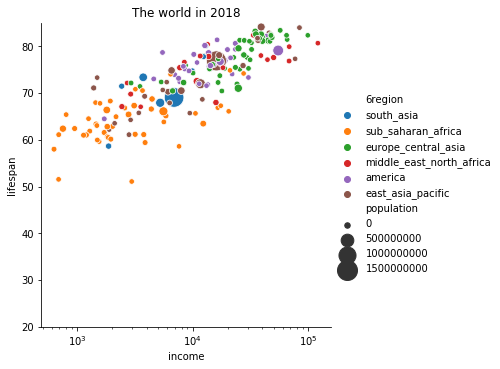

In [20]:
import matplotlib.pyplot as plt

sns.relplot(x='income', y='lifespan', size='population', hue='6region', sizes=(30,400), data=now);

plt.xscale('log')
plt.ylim(20,85)
plt.title("The world in 2018");
plt.show()


In [21]:
# Qatar richest countery in 2018
now.sort_values('income', ascending=False)

,geo,year,income,lifespan,population,country_code,country,6region
30362,qat,2018,121033,80.71,2694849,qat,Qatar,middle_east_north_africa
22212,lux,2018,99034,82.39,590321,lux,Luxembourg,europe_central_asia
31895,sgp,2018,83888,84.03,5791901,sgp,Singapore,east_asia_pacific
5521,brn,2018,76943,77.36,434076,brn,Brunei,east_asia_pacific
20241,kwt,2018,68359,79.96,4197128,kwt,Kuwait,middle_east_north_africa
922,are,2018,68231,76.89,9541615,are,United Arab Emirates,middle_east_north_africa
16956,irl,2018,65622,81.49,4803748,irl,Ireland,europe_central_asia
27296,nor,2018,64846,82.39,5353363,nor,Norway,europe_central_asia
6616,che,2018,57133,83.45,8544034,che,Switzerland,europe_central_asia
38246,usa,2018,54898,79.14,326766748,usa,United States,america


In [22]:
now_qatar = now[now['country'] == 'Qatar']
now_qatar

,geo,year,income,lifespan,population,country_code,country,6region
30362,qat,2018,121033,80.71,2694849,qat,Qatar,middle_east_north_africa


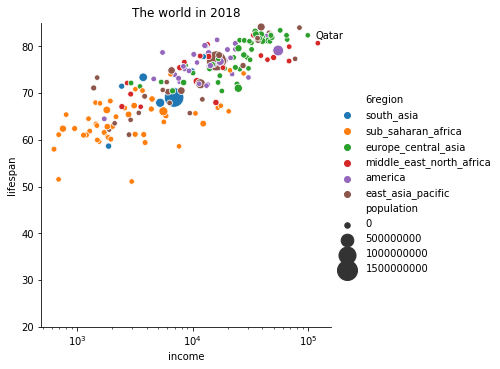

In [23]:
import matplotlib.pyplot as plt

sns.relplot(x='income', y='lifespan', size='population', hue='6region', sizes=(30,400), data=now);

plt.xscale('log')
plt.ylim(20,85)
plt.title("The world in 2018");
plt.text(x=now_qatar.income-5000, y=now_qatar.lifespan+1, s='Qatar')


plt.show()

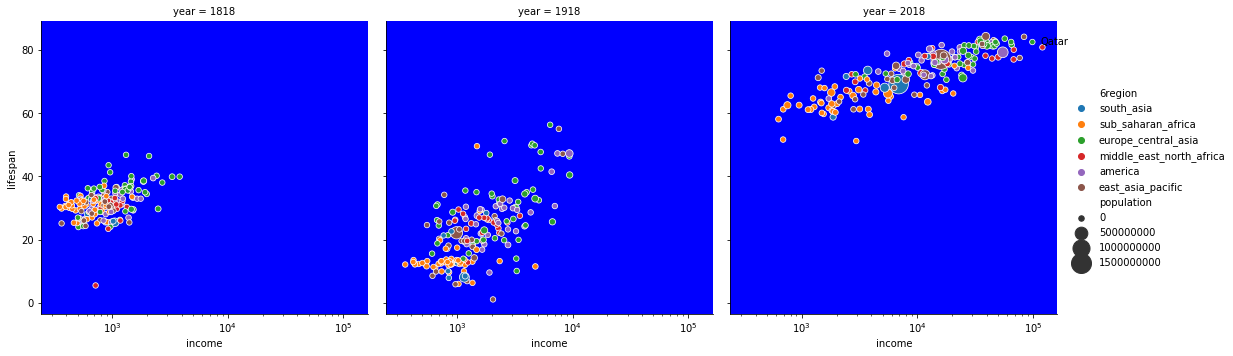

In [24]:
years=[1818, 1918, 2018]

centuries = merged[merged.year.isin(years)]


fig = sns.relplot(x='income', y='lifespan', size='population', hue='6region', sizes=(30,400), col='year', data=centuries);
# fig, ax = plt.subplots()

fig.set(facecolor="blue")
plt.xscale('log')
# plt.ylim(20,85)
#plt.title("The world in 1818, 1918, and 2018");
plt.text(x=now_qatar.income-5000, y=now_qatar.lifespan+1, s='Qatar')


plt.show()

In [89]:
# I'm going to try finding which country had the quickest growth. Let's get only the relevant data.
merged_pop = merged[['country', 'population', 'year']]
merged_pop.head()

,country,population,year
0,Afghanistan,3280000,1800
1,Afghanistan,3280000,1801
2,Afghanistan,3280000,1802
3,Afghanistan,3280000,1803
4,Afghanistan,3280000,1804


In [90]:
# Add a column for the year 1800
merged_pop = pd.merge(merged_pop,merged_pop[merged_pop['year'] == 1800].drop('year', axis=1).rename(columns = {'population':'pop_1800'}))
merged_pop

,country,population,year,pop_1800
0,Afghanistan,3280000,1800,3280000
1,Afghanistan,3280000,1801,3280000
2,Afghanistan,3280000,1802,3280000
3,Afghanistan,3280000,1803,3280000
4,Afghanistan,3280000,1804,3280000
5,Afghanistan,3280000,1805,3280000
6,Afghanistan,3280000,1806,3280000
7,Afghanistan,3280000,1807,3280000
8,Afghanistan,3280000,1808,3280000
9,Afghanistan,3280000,1809,3280000


In [94]:
# Add a column showing absolute growth
merged_pop['abs_growth_since_1800'] = merged_pop['population'] - merged_pop['pop_1800'] 
# The largest absolute growth was in india, followed by China and the US
merged_pop[merged_pop['year']==2018].sort_values('abs_growth_since_1800', ascending=False)

,country,population,year,pop_1800,abs_growth_since_1800
16643,India,1354051854,2018,168574895,1185476959
7007,China,1415045928,2018,321675013,1093370915
38105,United States,326766748,2018,6801854,319964894
16424,Indonesia,266794980,2018,16108545,250686435
5036,Brazil,210867954,2018,3639636,207228318
28031,Pakistan,200813818,2018,13123633,187690185
26498,Nigeria,195875237,2018,12100855,183774382
3284,Bangladesh,166368149,2018,19227358,147140791
23432,Mexico,130759074,2018,6181708,124577366
30659,Russia,143964709,2018,31088398,112876311


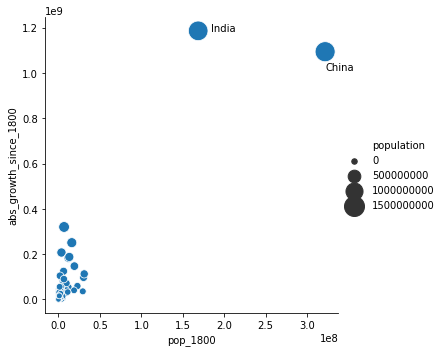

In [169]:
mp_now = merged_pop[merged_pop['year']==2018]
sns.relplot(x='pop_1800', y='abs_growth_since_1800', size='population', sizes=(30,400), data=mp_now);

india_now = mp_now[mp_now['country']=='India']
china_now = mp_now[mp_now['country']=='China']

plt.text(x=india_now['pop_1800']+15000000, y=india_now['abs_growth_since_1800'], s='India')
plt.text(x=china_now['pop_1800']-5000, y=china_now['abs_growth_since_1800']-80000000, s='China')

plt.show()

It's clear that the countries with the highest population also had the highest groth, which is a bit of a truism.

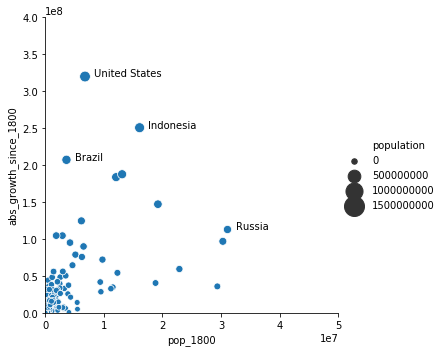

In [171]:
# Let's zoom into that bottom-left corner
sns.relplot(x='pop_1800', y='abs_growth_since_1800', size='population', sizes=(30,400), data=mp_now);

usa_now = mp_now[mp_now['country']=='United States']
plt.text(x=usa_now['pop_1800']+1500000, y=usa_now['abs_growth_since_1800'], s='United States')

brazil_now = mp_now[mp_now['country']=='Brazil']
plt.text(x=brazil_now['pop_1800']+1500000, y=brazil_now['abs_growth_since_1800'], s='Brazil')

russia_now = mp_now[mp_now['country']=='Russia']
plt.text(x=russia_now['pop_1800']+1500000, y=russia_now['abs_growth_since_1800'], s='Russia')

indonesia_now = mp_now[mp_now['country']=='Indonesia']
plt.text(x=indonesia_now['pop_1800']+1500000, y=indonesia_now['abs_growth_since_1800'], s='Indonesia')

plt.ylim(top=(0.4*10**9), bottom=0)
plt.xlim(right=(0.5*10**8), left=0)

plt.show()

What's less of a truism is the observation that the largest countries tended to be those which already had large populations to begin with. The major exceptions, such as the United States and Brazil, were also countries that grew much from immigration.

Indonesia seems like an outlier. I don't know of any signifigant periods of immigration in its history, and yet it's growth is abnormal for how small it was in 1800.

In [95]:
# Add a column showing relative growth
merged_pop['rel_growth_since_1800'] = merged_pop['population'] / merged_pop['pop_1800'] 
# The largest relative growth was actually the UAE, followed by mostly small countries.
merged_pop[merged_pop['year']==2018].sort_values('rel_growth_since_1800', ascending=False)

,country,population,year,pop_1800,abs_growth_since_1800,rel_growth_since_1800
875,United Arab Emirates,9541615,2018,40153,9501462,237.631435
5474,Brunei,434076,2018,2128,431948,203.983083
31754,Singapore,5791901,2018,30000,5761901,193.063367
30221,Qatar,2694849,2018,14092,2680757,191.232543
10292,Dominican Republic,10882996,2018,89000,10793996,122.280854
25841,Malaysia,32042458,2018,287000,31755458,111.646195
8759,Costa Rica,4953199,2018,51987,4901212,95.277646
1094,Argentina,44688864,2018,534000,44154864,83.687011
15548,Honduras,9417167,2018,126118,9291049,74.669492
1751,Australia,24772247,2018,351014,24421233,70.573387


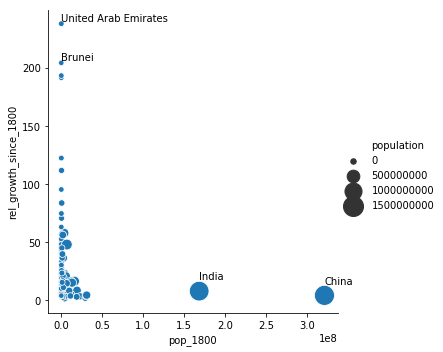

In [176]:
mp_now = merged_pop[merged_pop['year']==2018]
sns.relplot(x='pop_1800', y='rel_growth_since_1800', size='population', sizes=(30,400), data=mp_now);

india_now = mp_now[mp_now['country']=='India']
plt.text(x=india_now['pop_1800'], y=india_now['rel_growth_since_1800']+10, s='India')

china_now = mp_now[mp_now['country']=='China']
plt.text(x=china_now['pop_1800'], y=china_now['rel_growth_since_1800']+10, s='China')

uae_now = mp_now[mp_now['country']=='United Arab Emirates']
plt.text(x=uae_now['pop_1800'], y=uae_now['rel_growth_since_1800']+2, s='United Arab Emirates')

brunei_now = mp_now[mp_now['country']=='Brunei']
plt.text(x=brunei_now['pop_1800'], y=brunei_now['rel_growth_since_1800']+2, s='Brunei')


plt.show()

It seems there's no correlation between original size and relative growth, though the quickest relative growth comes from exceptionally small countries.

In [99]:
# Let's look at the population of india over time. 
indiaData = merged_pop[merged_pop['country'] == 'India']
indiaData.head()

,country,population,year,pop_1800,abs_growth_since_1800,rel_growth_since_1800
16425,India,168574895,1800,168574895,0,1.000000
16426,India,168907299,1801,168574895,332404,1.001972
16427,India,169240359,1802,168574895,665464,1.003948
16428,India,169574075,1803,168574895,999180,1.005927
16429,India,169908450,1804,168574895,1333555,1.007911


In [102]:
# Add a column indicating the next years population.
indiaData['next_pop'] = list(indiaData['population'])[1:] + list(indiaData['population'])[:1] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [104]:
# Create column showing that year's growth
indiaData['yearly_growth'] = indiaData['next_pop'] - indiaData['population']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [121]:
indiaData.head()

,country,population,year,pop_1800,abs_growth_since_1800,rel_growth_since_1800,next_pop,yearly_growth
16425,India,168574895,1800,168574895,0,1.000000,168907299,332404
16426,India,168907299,1801,168574895,332404,1.001972,169240359,333060
16427,India,169240359,1802,168574895,665464,1.003948,169574075,333716
16428,India,169574075,1803,168574895,999180,1.005927,169908450,334375
16429,India,169908450,1804,168574895,1333555,1.007911,170243483,335033


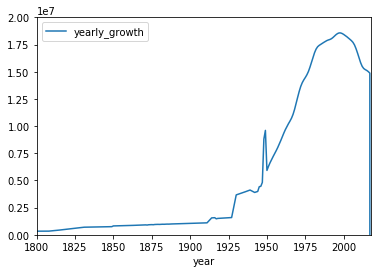

In [118]:
# This shows that india's population didn't really get going until after the 1920s.
# Additionally, their population growth has slowed down. It's decelerating.
indiaData.plot(x='year', y=['yearly_growth']);
plt.ylim(bottom=0, top=20000000);

There's an odd spike around 1950. I wonder what it could be?

In [181]:
# Let's look at its relative growth.
indiaData['yearly_relative_growth'] = indiaData['next_pop']/indiaData['population']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


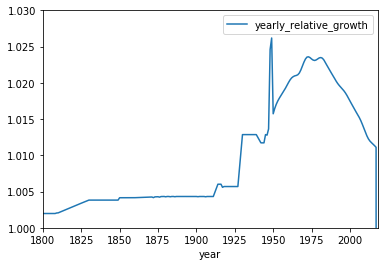

In [194]:
indiaData.plot(x='year', y=['yearly_relative_growth']);
plt.ylim(bottom=1, top=1.03);

As can be seen by the increadibly small scale, India hasn't grown out of proportion to it's population, though that spike stands out much more here.

In [195]:
# That odd spike around 1950 seems to coincide with the partition of India, in which millions of people were displaced
# as India and Pakistan were split into separate countries.
indiaData[(1951 > indiaData['year']) & (indiaData['year'] > 1945)]

,country,population,year,pop_1800,abs_growth_since_1800,rel_growth_since_1800,next_pop,yearly_growth,yearly_relative_growth
16571,India,348641193,1946,168574895,180066298,2.068168,353099593,4458400,1.012788
16572,India,353099593,1947,168574895,184524698,2.094616,357915964,4816371,1.013640
16573,India,357915964,1948,168574895,189341069,2.123187,366721344,8805380,1.024602
16574,India,366721344,1949,168574895,198146449,2.175421,376325200,9603856,1.026188
16575,India,376325200,1950,168574895,207750305,2.232392,382245303,5920103,1.015731


In [130]:
# Let's do what we did with India to the UAE
UAEData = merged_pop[merged_pop['country'] == 'United Arab Emirates']
UAEData['next_pop'] = list(UAEData['population'])[1:] + list(UAEData['population'])[:1] 
UAEData['yearly_growth'] = UAEData['next_pop'] - UAEData['population']
UAEData.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,country,population,year,pop_1800,abs_growth_since_1800,rel_growth_since_1800,next_pop,yearly_growth
657,United Arab Emirates,40153,1800,40153,0,1.0,40153,0
658,United Arab Emirates,40153,1801,40153,0,1.0,40153,0
659,United Arab Emirates,40153,1802,40153,0,1.0,40153,0
660,United Arab Emirates,40153,1803,40153,0,1.0,40153,0
661,United Arab Emirates,40153,1804,40153,0,1.0,40153,0


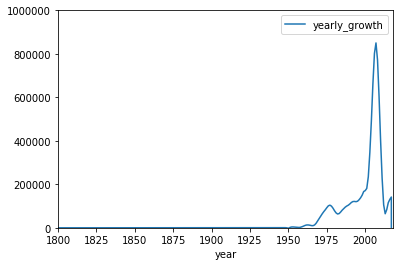

In [135]:
# It's clear that the UAE got most of its population very quickly after the year 200, and whatever caused that influx has severly dissipated.
UAEData.plot(x='year', y=['yearly_growth']);
plt.ylim(bottom=0, top=1000000);

In [196]:
UAEData['yearly_relative_growth'] = UAEData['next_pop']/UAEData['population']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


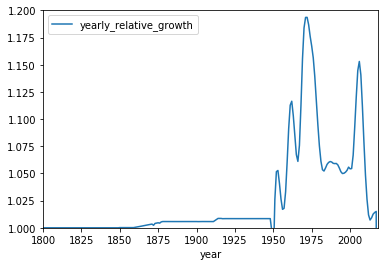

In [202]:
UAEData.plot(x='year', y=['yearly_relative_growth']);
plt.ylim(bottom=1, top=1.2);

Interestingly, the UAE's maximum relative growth happened before the largest population growth spike. I suppose that's to be expected when one starts out so small.

Since it seemed weird, I'm going to look at Indonesia's data as well.

In [177]:
indonesiaData = merged_pop[merged_pop['country'] == 'Indonesia']
indonesiaData['next_pop'] = list(indonesiaData['population'])[1:] + list(indonesiaData['population'])[:1] 
indonesiaData['yearly_growth'] = indonesiaData['next_pop'] - indonesiaData['population']
indonesiaData.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,country,population,year,pop_1800,abs_growth_since_1800,rel_growth_since_1800,next_pop,yearly_growth
16206,Indonesia,16108545,1800,16108545,0,1.000000,16150710,42165
16207,Indonesia,16150710,1801,16108545,42165,1.002618,16192985,42275
16208,Indonesia,16192985,1802,16108545,84440,1.005242,16235371,42386
16209,Indonesia,16235371,1803,16108545,126826,1.007873,16277868,42497
16210,Indonesia,16277868,1804,16108545,169323,1.010511,16320476,42608


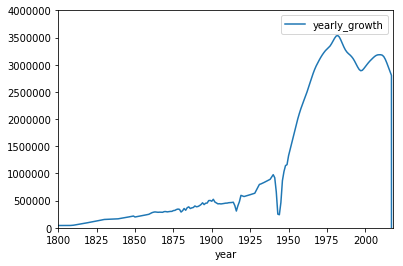

In [180]:
indonesiaData.plot(x='year', y=['yearly_growth']);
plt.ylim(bottom=0, top=4000000);

Hmm... Hard to glean much from this data. Much of Indonesia's unusual growth comes immediately after a steep dip in the 1940s coinciding with Japanese occupation during WWII. 

In [203]:
indonesiaData['yearly_relative_growth'] = indonesiaData['next_pop']/indonesiaData['population']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


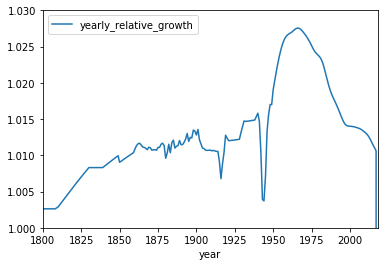

In [206]:
indonesiaData.plot(x='year', y=['yearly_relative_growth']);
plt.ylim(bottom=1, top=1.03);

It was able to maintain growth similar to India's highest rate for an extended period of time around the 1960s and 70s. I don't know why, and whatever the cause, it seems to have faded by the 90s.

# STRETCH OPTIONS

## 1. Animate!

- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- Try using [Plotly](https://plot.ly/python/animations/)!
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)
- [Using Phoebe for animations in Google Colab](https://colab.research.google.com/github/phoebe-project/phoebe2-docs/blob/2.1/tutorials/animations.ipynb)

## 2. Study for the Sprint Challenge

- Concatenate DataFrames
- Merge DataFrames
- Reshape data with `pivot_table()` and `.melt()`
- Be able to reproduce a FiveThirtyEight graph using Matplotlib or Seaborn.

## 3. Work on anything related to your portfolio site / Data Storytelling Project

In [0]:
# TODO